<a href="https://colab.research.google.com/github/bwaves26/statclass/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
library(dplyr)
library(ggplot2)

In [23]:
police_killings <- read.csv("police_killings.csv")

Warning message:
“There were 10 warnings in `filter()`.
The first warning was:
ℹ In argument: `&...`.
Caused by warning in `grepl()`:
! unable to translate 'Rub<cc>_<e5><a9>n Garc<cc>__a Villalpando' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 9 remaining warnings.”


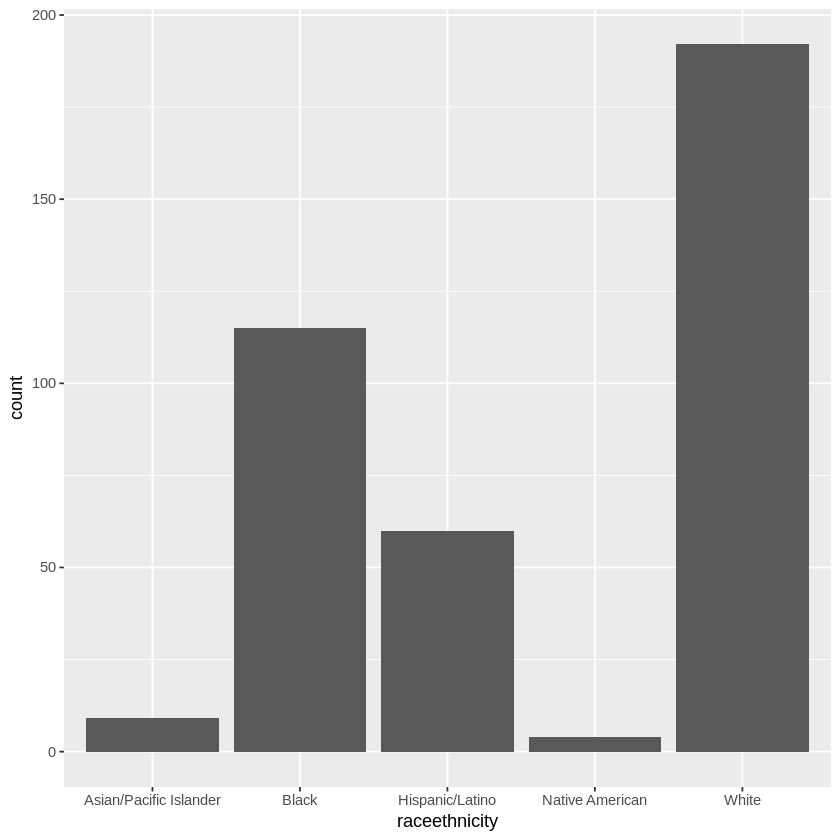

In [25]:
police_killings_clean <- police_killings %>%
  filter(if_all(everything(), ~ !grepl("unknown|^0$", ., ignore.case = TRUE)))%>%
  filter(!is.na(county_bucket))

police_killings_clean %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()



In [28]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

In [29]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )

In [30]:
black_total_pop <- sum(police_killings_clean$blackpop)
white_total_pop <- sum(police_killings_clean$whitepop)
hispanic_total_pop <- sum(police_killings_clean$hispanicpop)

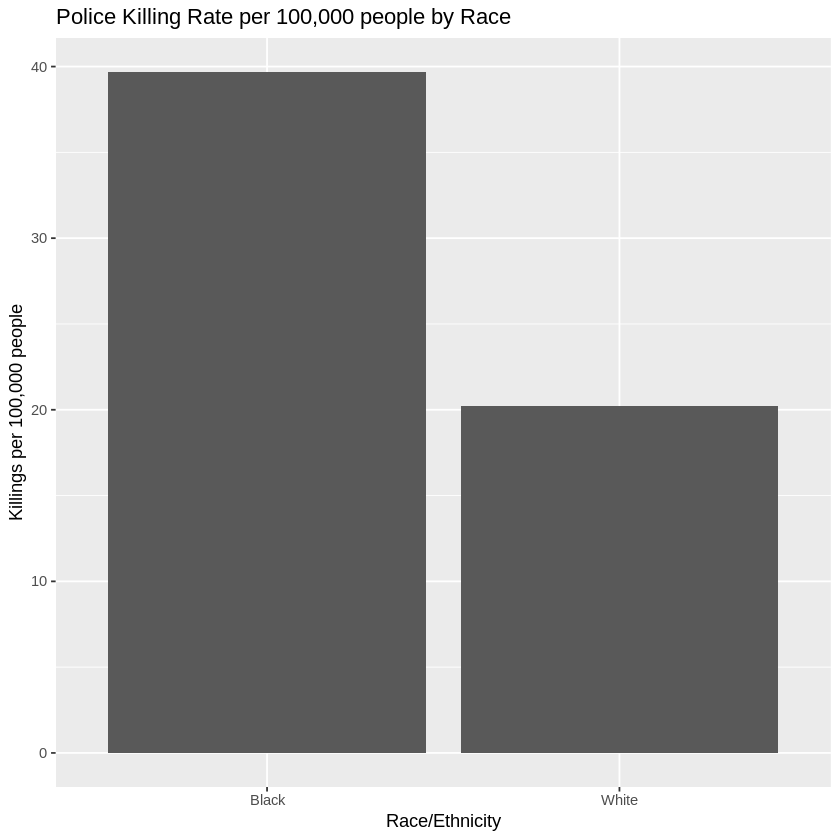

In [32]:
# prompt: how do i make the graph based on rate (killings per population

# Calculate the number of killings per race
killings_by_race <- police_killings_clean %>%
  group_by(raceethnicity) %>%
  summarize(killings = n())

# Calculate the total population per race
population_by_race <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic"),
  population = c(white_total_pop, black_total_pop, hispanic_total_pop)
)

# Merge the two data frames
killings_and_population <- merge(killings_by_race, population_by_race, by = "raceethnicity")

# Calculate the killings per 100,000 people
killings_and_population <- killings_and_population %>%
  mutate(rate = (killings / population) * 100000)


# Create the plot
ggplot(killings_and_population, aes(x = raceethnicity, y = rate)) +
  geom_col() +
  labs(title = "Police Killing Rate per 100,000 people by Race",
       x = "Race/Ethnicity",
       y = "Killings per 100,000 people")


In [ ]:
# prompt: what question should i ask next

# Consider these questions:

# 1.  Data Exploration and Cleaning:
#  * How many missing values are there in each column?
#  * What are the unique values for the 'raceethnicity' and 'manner_of_death' columns?
#  * Are there any outliers or inconsistencies in the data that need addressing?
#  * What is the distribution of ages in the dataset?

# 2. Visualization Enhancements:
# * Can we improve the readability of the bar chart (e.g. add labels, change colors)?
#  * How does the distribution of raceethnicity vary across different states or cities?
#  * Create a visualization showing the relationship between age and manner of death.
#  * Is there a correlation between the victim's mental illness status and the outcome?

# 3.  Statistical Analysis:
# * What is the proportion of killings for each raceethnicity group?
# * Are there significant differences in killing rates among different racial groups?
# * Is there a correlation between the manner of death and the victim's raceethnicity?

# 4. Addressing Ethical Considerations:
# * How might biases in data collection impact the results?
# * What are some limitations of the data, and how might they affect our conclusions?
# * What are some potential next steps in analyzing the data, and what additional data sources could be helpful?

# Example of a more specific question based on the provided code:
# "How can I order the bars in the bar chart of raceethnicity by frequency to improve readability?"
